# Feature Engineering

## Import libraries

In [43]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
warnings.filterwarnings('ignore')

## Import Data

In [16]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

##  Explore the dataset

#### Explore the dataset shape

In [3]:
# Change the setting to display all required rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
train.shape

(10886, 12)

In [5]:
train.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [6]:
test.shape

(6493, 9)

In [7]:
test.head(2)

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000

In [8]:
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [9]:
test.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

In [10]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
train.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [12]:
test.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

Instead of using the datetime feature directly, we could extract some more useful features from it.

In [17]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["year"] = train.datetime.apply(lambda x : x.split()[0].split("-")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
train["day"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").day)
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
train["weekday"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday() + 1)

train = train.drop(["datetime","date"],axis=1)

In [18]:
train.head(2)

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   

   casual  registered  count  year  month  day  hour  weekday  
0       3          13     16  2011      1    1     0        6  
1       8          32     40  2011      1    1     1        6

In [19]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["year"] = test.datetime.apply(lambda x : x.split()[0].split("-")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
test["day"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").day)
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
test["weekday"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday() + 1)

test = test.drop(["datetime","date"],axis=1)

In [20]:
test.head(2)

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   

   year  month  day  hour  weekday  
0  2011      1   20     0        4  
1  2011      1   20     1        4

There is not any missing values in the training or test set. However, in the windspeed column, there are many records which have the value 0, this might be treated as missing values. We could use random forest and linear regression to fill the zeros, to see if there will be any improvement for the final prediction result.

In [33]:
from sklearn.ensemble import RandomForestRegressor

train['windspeed_forest'] = train['windspeed']

train_random = train[['windspeed','season','holiday','workingday','weather','temp','atemp','humidity','year','month','day','hour','weekday']]
know_wind = train_random[train_random['windspeed'] != 0].as_matrix()
guess_wind = train_random[train_random['windspeed'] == 0].as_matrix()

y = know_wind[:,0]
x = know_wind[:,1:]

rfr = RandomForestRegressor(random_state = 0,n_estimators = 2000, n_jobs = -1)
rfr.fit(x,y)

predicted_wind = rfr.predict(guess_wind[:,1:])

train.loc[train.windspeed == 0,'windspeed_forest'] = predicted_wind

In [34]:
train.head(2)

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   

   casual  registered  count  year  month  day  hour  weekday  \
0       3          13     16  2011      1    1     0        6   
1       8          32     40  2011      1    1     1        6   

   windspeed_forest  windspeed_linear  
0          8.669576               0.0  
1          8.313816               0.0

In [35]:
test['windspeed_forest'] = test['windspeed']

test_random = test[['windspeed','season','holiday','workingday','weather','temp','atemp','humidity','year','month','day','hour','weekday']]
know_wind = test_random[test_random['windspeed'] != 0].as_matrix()
guess_wind = test_random[test_random['windspeed'] == 0].as_matrix()

y = know_wind[:,0]
x = know_wind[:,1:]

rfr = RandomForestRegressor(random_state = 0,n_estimators = 2000, n_jobs = -1)
rfr.fit(x,y)

predicted_wind = rfr.predict(guess_wind[:,1:])

test.loc[test.windspeed == 0,'windspeed_forest'] = predicted_wind

In [36]:
test.head(2)

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   

   year  month  day  hour  weekday  windspeed_forest  
0  2011      1   20     0        4          26.00270  
1  2011      1   20     1        4          11.49315

In [37]:
from sklearn import linear_model

train['windspeed_linear'] = train['windspeed']

train_linear = train[['windspeed','season','holiday','workingday','weather','temp','atemp','humidity','year','month','day','hour','weekday']]
know_wind = train_linear[train_linear['windspeed'] != 0].as_matrix()
guess_wind = train_linear[train_linear['windspeed'] == 0].as_matrix()

y = know_wind[:,0]
x = know_wind[:,1:]

lr = linear_model.LinearRegression()
lr.fit(x,y)

predicted_wind = lr.predict(guess_wind[:,1:])

train.loc[train.windspeed == 0,'windspeed_linear'] = predicted_wind

In [38]:
train.head(2)

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   

   casual  registered  count  year  month  day  hour  weekday  \
0       3          13     16  2011      1    1     0        6   
1       8          32     40  2011      1    1     1        6   

   windspeed_forest  windspeed_linear  
0          8.669576         10.607949  
1          8.313816         10.722611

In [39]:
test['windspeed_linear'] = test['windspeed']

test_linear = test[['windspeed','season','holiday','workingday','weather','temp','atemp','humidity','year','month','day','hour','weekday']]
know_wind = test_linear[test_linear['windspeed'] != 0].as_matrix()
guess_wind = test_linear[test_linear['windspeed'] == 0].as_matrix()

y = know_wind[:,0]
x = know_wind[:,1:]

lr = linear_model.LinearRegression()
lr.fit(x,y)

predicted_wind = lr.predict(guess_wind[:,1:])

test.loc[test.windspeed == 0,'windspeed_linear'] = predicted_wind

In [40]:
test.head(2)

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   

   year  month  day  hour  weekday  windspeed_forest  windspeed_linear  
0  2011      1   20     0        4          26.00270         26.002700  
1  2011      1   20     1        4          11.49315         14.315467

Since the dimensions of the features are different, normalisation could be done to reduce the potential impact.

In [44]:
from sklearn import preprocessing

train['temp_scale'] = train['temp']
train['atemp_scale'] = train['atemp']
train['humidity_scale'] = train['humidity']
train['windspeed_scale'] = train['windspeed']
train['windspeed_forest_scale'] = train['windspeed_forest']
train['windspeed_linear_scale'] = train['windspeed_linear']

st1 = np.array(train[['temp']])
scaler = preprocessing.StandardScaler().fit(st1)
train['temp_scale'] = scaler.transform(st1)

st2 = np.array(train[['atemp']])
scaler = preprocessing.StandardScaler().fit(st2)
train['atemp_scale'] = scaler.transform(st2)

st3 = np.array(train[['humidity']])
scaler = preprocessing.StandardScaler().fit(st3)
train['humidity_scale'] = scaler.transform(st3)

st4 = np.array(train[['windspeed']])
scaler = preprocessing.StandardScaler().fit(st4)
train['windspeed_scale'] = scaler.transform(st4)


st5 = np.array(train[['windspeed_forest']])
scaler = preprocessing.StandardScaler().fit(st5)
train['windspeed_forest_scale'] = scaler.transform(st5)


st6 = np.array(train[['windspeed_linear']])
scaler = preprocessing.StandardScaler().fit(st6)
train['windspeed_linear_scale'] = scaler.transform(st6)

In [45]:
train.head(2)

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   

   casual  registered  count  year  month  day  hour  weekday  \
0       3          13     16  2011      1    1     0        6   
1       8          32     40  2011      1    1     1        6   

   windspeed_forest  windspeed_linear  temp_scale  atemp_scale  \
0          8.669576         10.607949   -1.333661    -1.092737   
1          8.313816         10.722611   -1.438907    -1.182421   

   humidity_scale  windspeed_scale  windspeed_forest_scale  \
0        0.993213        -1.567754               -0.793322   
1        0.941249        -1.567754               -0.845406   

   windspeed_linear_scale  
0               -0.556338  
1               -0.539315

In [46]:
test['temp_scale'] = test['temp']
test['atemp_scale'] = test['atemp']
test['humidity_scale'] = test['humidity']
test['windspeed_scale'] = test['windspeed']
test['windspeed_forest_scale'] = test['windspeed_forest']
test['windspeed_linear_scale'] = test['windspeed_linear']

st1 = np.array(test[['temp']])
scaler = preprocessing.StandardScaler().fit(st1)
test['temp_scale'] = scaler.transform(st1)

st2 = np.array(test[['atemp']])
scaler = preprocessing.StandardScaler().fit(st2)
test['atemp_scale'] = scaler.transform(st2)

st3 = np.array(test[['humidity']])
scaler = preprocessing.StandardScaler().fit(st3)
test['humidity_scale'] = scaler.transform(st3)

st4 = np.array(test[['windspeed']])
scaler = preprocessing.StandardScaler().fit(st4)
test['windspeed_scale'] = scaler.transform(st4)


st5 = np.array(test[['windspeed_forest']])
scaler = preprocessing.StandardScaler().fit(st5)
test['windspeed_forest_scale'] = scaler.transform(st5)


st6 = np.array(test[['windspeed_linear']])
scaler = preprocessing.StandardScaler().fit(st6)
test['windspeed_linear_scale'] = scaler.transform(st6)

In [47]:
test.head(2)

season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   

   year  month  day  hour  weekday  windspeed_forest  windspeed_linear  \
0  2011      1   20     0        4          26.00270         26.002700   
1  2011      1   20     1        4          11.49315         14.315467   

   temp_scale  atemp_scale  humidity_scale  windspeed_scale  \
0   -1.235966    -1.440193       -0.421172         1.620888   
1   -1.235966    -1.181711       -0.421172        -1.531139   

   windspeed_forest_scale  windspeed_linear_scale  
0                1.757632                1.741965  
1               -0.374571               -0.003441

#### Continuous features analysis

In [49]:
# Select all the original continuous features from the training set
originalData = train.iloc[:,4:8]
originalData.head(10)

temp   atemp  humidity  windspeed
0   9.84  14.395        81     0.0000
1   9.02  13.635        80     0.0000
2   9.02  13.635        80     0.0000
3   9.84  14.395        75     0.0000
4   9.84  14.395        75     0.0000
5   9.84  12.880        75     6.0032
6   9.02  13.635        80     0.0000
7   8.20  12.880        86     0.0000
8   9.84  14.395        75     0.0000
9  13.12  17.425        76     0.0000

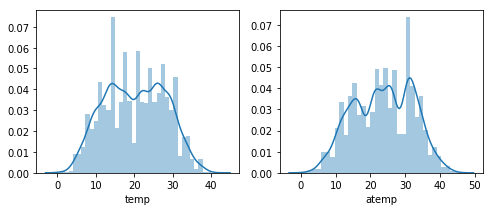

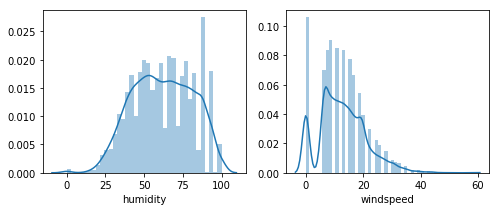

In [50]:
colName = originalData.columns

n_cols = 2
n_rows = 2

# Plot the distribution of the continuous features
for i in range(n_rows):
    fg,ax = plt.subplots(nrows = 1, ncols = n_cols, figsize=(8, 3))
    for j in range(n_cols):
        sns.distplot(originalData[colName[i*n_cols+j]],ax=ax[j])
        
#plt.savefig("OriContDist.png")
plt.show()

The original windspeed feature approximate a right-skewed normal distribution while the other features approximate a normal distribution.

In [51]:
scaledData = train.iloc[:,16:]
scaledData.head(10)

windspeed_forest  windspeed_linear  temp_scale  atemp_scale  \
0          8.669576         10.607949   -1.333661    -1.092737   
1          8.313816         10.722611   -1.438907    -1.182421   
2          8.184388         10.763212   -1.438907    -1.182421   
3          7.794458         11.529895   -1.333661    -1.092737   
4          7.567600         11.570496   -1.333661    -1.092737   
5          6.003200          6.003200   -1.333661    -1.271515   
6          8.181682         10.925615   -1.438907    -1.182421   
7          8.844251         10.103520   -1.544154    -1.271515   
8          9.365863         11.732899   -1.333661    -1.092737   
9         13.404512         11.883842   -0.912675    -0.735182   

   humidity_scale  windspeed_scale  windspeed_forest_scale  \
0        0.993213        -1.567754               -0.793322   
1        0.941249        -1.567754               -0.845406   
2        0.941249        -1.567754               -0.864355   
3        0.681430        -1.567754               -0.921442   
4        0.681430        -1.567754               -0.954655   
5        0.681430        -0.832442               -1.183689   
6        0.941249        -1.567754               -0.864751   
7        1.253032        -1.567754               -0.767748   
8        0.681430        -1.567754               -0.691382   
9        0.733394        -1.567754               -0.100109   

   windspeed_linear_scale  
0               -0.556338  
1               -0.539315  
2               -0.533288  
3               -0.419467  
4               -0.413440  
5               -1.239952  
6               -0.509178  
7               -0.631225  
8               -0.389330  
9               -0.366921

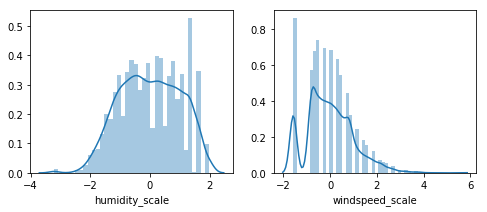

In [53]:
colName = scaledData.columns

n_cols = 2
n_rows = 4

# Plot the distribution of the scaled continuous features
for i in range(n_rows):
    fg,ax = plt.subplots(nrows = 1, ncols = n_cols, figsize=(8, 3))
    for j in range(n_cols):
        sns.distplot(scaledData[colName[i*n_cols+j]],ax=ax[j])
        
#plt.savefig("ScaledContDist.png")
plt.show()

The windspeed_forest and windspeed_linear are produced by filling all the 0 values of the original windspeed column using random forest and linear regression. Both the filled and scaled windspeed approximate a right-skewed normal distribution. The scaled temperature, apparent temperature and humidity approximate a normal distribution.

In [54]:
sns.distplot(train["count"])
#plt.savefig("OriCountDist.png")
plt.show()

In [55]:
plt.boxplot(train["count"], notch=False, sym='bs')
#plt.savefig("OriCountBox.png")
plt.show()

In [56]:
sns.distplot(np.log(train["count"]))
#plt.savefig("LogCountDist.png")
plt.show()

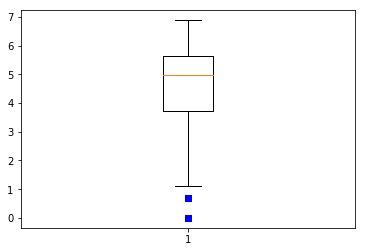

In [57]:
plt.boxplot(np.log(train["count"]), notch=False, sym='bs')
#plt.savefig("ScaledCountBox.png")
plt.show()

The distribution of the count values is right-skewed, and the count itself has a lot of outliers, so a natural logarithm could be applied to this column to adjust the skewness to help model training and eliminate most of the outliers.

In [58]:
train["casual_log"] = np.log(train["casual"] + 1)

sns.distplot((train["casual"]))
plt.show()

In [59]:
sns.distplot((train["casual_log"]))
plt.show()

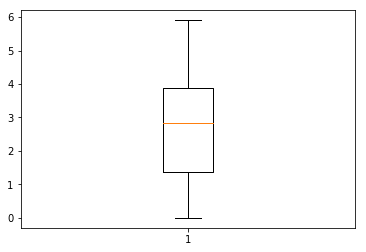

In [60]:
plt.boxplot(np.log(train["casual"]), notch=False, sym='bs')
plt.show()

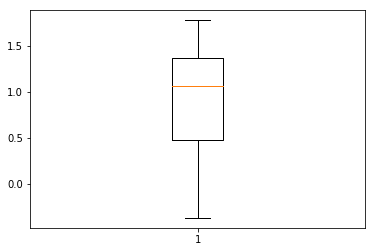

In [61]:
plt.boxplot(np.log(train["casual_log"]), notch=False, sym='bs')
plt.show()

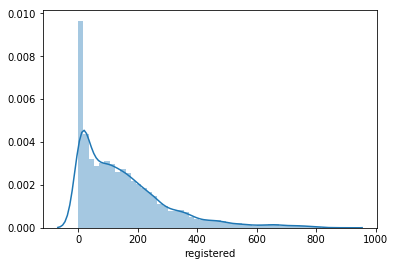

In [62]:
train["registered_log"] = np.log(train["registered"] + 1)

sns.distplot((train["registered"]))
plt.show()

In [63]:
sns.distplot((train["registered_log"]))
plt.show()

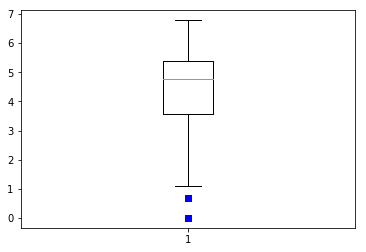

In [64]:
plt.boxplot(np.log(train["registered"]), notch=False, sym='bs')
plt.show()

In [65]:
plt.boxplot(np.log(train["registered_log"]), notch=False, sym='bs')
plt.show()

Added two new features: log(casual + 1) and log(registered + 1)

In [68]:
# Add 'count' into this dataframe
originalData["count"] = train["count"]
originalData["casual"] = train["casual"]
originalData["casual_log"] = train["casual_log"]
originalData["registered"] = train["registered"]
originalData["registered_log"] = train["registered_log"]

# Compute the correlation matrix
corr = originalData.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f,ax = plt.subplots(figsize=(12,9))

# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation matrix in a heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidth=.5, annot=True)

#plt.savefig("OriContCorr.png")
plt.show()

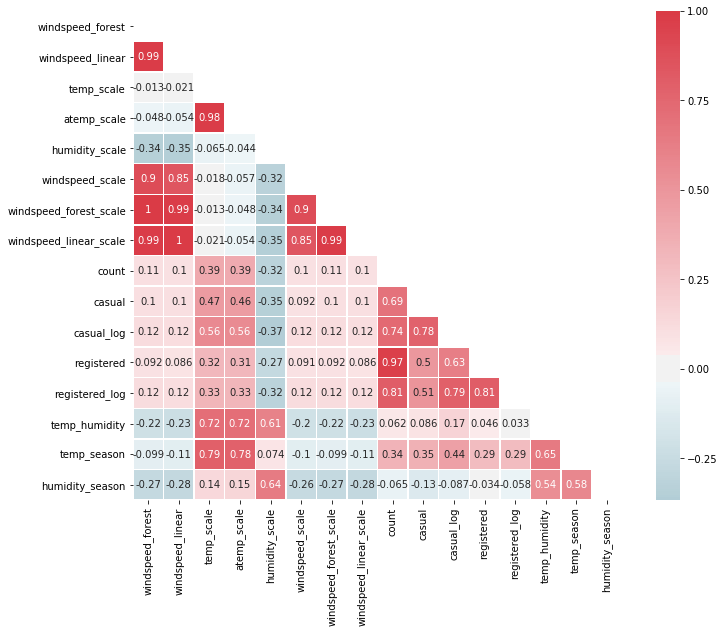

In [71]:
# Add 'count' into this dataframe
scaledData["count"] = train["count"]
scaledData["casual"] = train["casual"]
scaledData["casual_log"] = train["casual_log"]
scaledData["registered"] = train["registered"]
scaledData["registered_log"] = train["registered_log"]
scaledData["temp_humidity"] = train["temp"] * train["humidity"]
scaledData["temp_season"] = train["temp"] * train["season"]
scaledData["humidity_season"] = train["humidity"] * train["season"]

# Compute the correlation matrix
corr = scaledData.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f,ax = plt.subplots(figsize=(12,9))

# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation matrix in a heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidth=.5, annot=True)

#plt.savefig("ScaledContCorr.png")
plt.show()

The above two plots show the Pearson's correlation coefficients between the count and the original or scaled continuous features. It is obvious to see that the count has some weak correlations with temperature/apparent temperature and humidity, but the correlation between the count and the windspeed is not that obvious. And since the temperature and apparent temperature have a very strong correlation with each other, only one of them should be kept for model training in order to avoid multicollinearity.

In [72]:
train["temp_humidity"] = scaledData["temp_humidity"]
train["temp_season"] = scaledData["temp_season"]
train["humidity_season"] = scaledData["humidity_season"]

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   

   casual  registered  count  year  month  day  hour  weekday  \
0       3          13     16  2011      1    1     0        6   
1       8          32     40  2011      1    1     1        6   

   windspeed_forest  windspeed_linear  temp_scale  atemp_scale  \
0          8.669576         10.607949   -1.333661    -1.092737   
1          8.313816         10.722611   -1.438907    -1.182421   

   humidity_scale  windspeed_scale  windspeed_forest_scale  \
0        0.993213        -1.567754               -0.793322   
1        0.941249        -1.567754               -0.845406   

   windspeed_linear_scale  casual_log  registered_log  temp_humidity  \
0               -0.556338    1.386294        2.639057         797.04   
1               -0.539315    2.197225        3.496508         721.60   

   temp_season  humidity_season  
0         9.84               81  
1         9.02               80

In [76]:
train.head(2)
train.to_csv("train_newFeatures.csv")

In [74]:
test["temp_humidity"] = test["temp"] * test["humidity"]
test["temp_season"] = test["temp"] * test["season"]
test["humidity_season"] = test["humidity"] * test["season"]

In [77]:
test.head(2)
test.to_csv("test_newFeatures.csv")

#### Categorical features analysis

There are 5 original categorical features in the datasets, and we have extract 5 more from them and drop one of the original categorical features "datetime" since the format of the datetime is not very useful for data analysis and model training. So for now there are 9 categorical features (Year, Month, Day, Hour, Day of the Week, Holiday, Working Day, Seasons and Weather) and in this section the patterns between the count and these categorical features will be explored.

In [94]:
# Get all the categorical features from the training set
originalCatVar = train.iloc[:,1:5]
extractCatVar = train.iloc[:,10:15]
extractCatVar["weekday"] = extractCatVar["weekday"] + 1
catVar = pd.concat([originalCatVar,extractCatVar],axis=1)
catVar.head(2)

season  holiday  workingday  weather  hour  year  weekday  month  day
0       1        0           0        1     0  2011        6      1    1
1       1        0           0        1     1  2011        6      1    1

In [95]:
# Prepare the data for visualisation and analysis
catVar["season"] = catVar.season.map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter" })
catVar["holiday"] = catVar.holiday.map({1: "Yes", 0: "No" })
catVar["workingday"] = catVar.workingday.map({1: "Yes", 0: "No" })
catVar["weather"] = catVar.weather.map({1: "Clear or cloudy", 
                                        2: "Misty", 
                                        3: "Light rain or snow", 
                                        4: "Extreme weather" })
catVar["weekday"] = catVar.weekday.map({1: "Monday", 
                                        2: "Tuesday", 
                                        3: "Wednesday", 
                                        4: "Thursday", 
                                        5: "Friday", 
                                        6: "Saturday", 
                                        7: "Sunday" })
catVar["month"] = catVar.month.map({1: "January", 
                                    2: "February", 
                                    3: "March", 
                                    4: "April", 
                                    5: "May", 
                                    6: "June", 
                                    7: "July", 
                                    8: "August", 
                                    9: "September", 
                                    10: "October", 
                                    11: "November", 
                                    12: "December" })
catVar["count"] = train["count"]
catVar.head(5)

season holiday workingday          weather  hour  year   weekday    month  \
0  Spring      No         No  Clear or cloudy     0  2011  Saturday  January   
1  Spring      No         No  Clear or cloudy     1  2011  Saturday  January   
2  Spring      No         No  Clear or cloudy     2  2011  Saturday  January   
3  Spring      No         No  Clear or cloudy     3  2011  Saturday  January   
4  Spring      No         No  Clear or cloudy     4  2011  Saturday  January   

   day  count  
0    1     16  
1    1     40  
2    1     32  
3    1     13  
4    1      1

In [194]:
seasonCount = pd.DataFrame(catVar.groupby("season", sort=True)["count"].sum()).reset_index()
seasonSorted = seasonCount.sort_values(by="count", ascending=False)
sns.barplot(data=seasonSorted, x="season", y="count")
plt.xlabel("Season")
plt.xticks(fontsize=9)
plt.ylabel("Sum Count")
x = np.arange(4)
y = np.array(list(seasonSorted["count"]))
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha="center", va="bottom", fontsize=8)
plt.savefig("season-sumCount.png")
plt.show()

In [136]:
seasonCount = pd.DataFrame(catVar.groupby(["hour","season"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=seasonCount["hour"], y=seasonCount["count"], hue=seasonCount["season"], data=seasonCount, join=True)
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.legend(loc=2, prop={'size':10}, title="Season")
plt.savefig("season-hour.png")
plt.show()

It is obvious to see that spring has the lowest average bike demand and there are two peaks of demand in a day which are around 7-9 am and 5-6 pm, and as is well-known that these two time slots normally are rush hours.

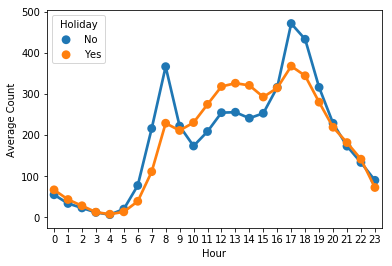

In [135]:
holidayCount = pd.DataFrame(catVar.groupby(["hour","holiday"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=holidayCount["hour"], y=holidayCount["count"], hue=holidayCount["holiday"], data=holidayCount, join=True)
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.legend(loc=2, prop={'size':10}, title="Holiday")
plt.savefig("holiday-hour.png")
plt.show()

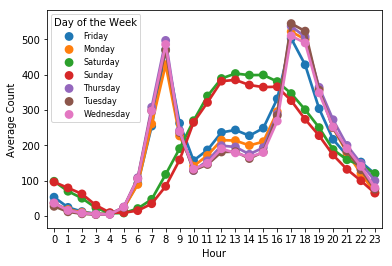

In [134]:
weekdayCount = pd.DataFrame(catVar.groupby(["hour","weekday"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=weekdayCount["hour"], y=weekdayCount["count"], hue=weekdayCount["weekday"], data=weekdayCount, join=True)
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.legend(loc=2, prop={'size':8}, title="Day of the Week")
plt.savefig("weekday-hour.png")
plt.show()

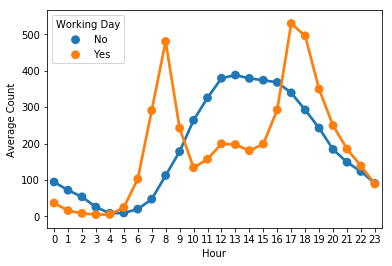

In [132]:
workingdayCount = pd.DataFrame(catVar.groupby(["hour","workingday"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=workingdayCount["hour"], y=workingdayCount["count"], hue=workingdayCount["workingday"], data=workingdayCount, join=True)
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.legend(loc=2, prop={'size':10}, title="Working Day")
plt.savefig("workingday-hour.png")
plt.show()

These three features show a very similar pattern, that in working days, the peaks of bike demand appear at rush hours and the demand will drop down a lot between 9 am and 4 pm. However, in the weekends and holidays, the peaks of bike demand exactly appear between 9 am and 4 pm. So in the working days, the major user group of bike sharing is office workers and students, however, in weekends and holidays, the major user group is citizens who have demands for short trips.

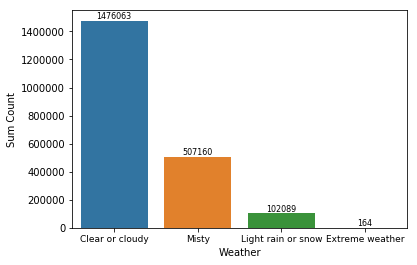

In [160]:
weatherCount = pd.DataFrame(catVar.groupby("weather", sort=True)["count"].sum()).reset_index()
weatherSorted = weatherCount.sort_values(by="count", ascending=False)
sns.barplot(data=weatherSorted, x="weather", y="count")
plt.xlabel("Weather")
plt.xticks(fontsize=9)
plt.ylabel("Sum Count")
x = np.arange(4)
y = np.array(list(weatherSorted["count"]))
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha="center", va="bottom", fontsize=8)
plt.savefig("weather-sumCount.png")
plt.show()

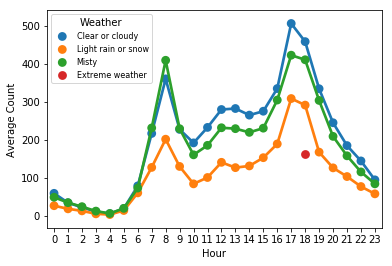

In [161]:
weatherCount = pd.DataFrame(catVar.groupby(["hour","weather"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=weatherCount["hour"], y=weatherCount["count"], hue=weatherCount["weather"], data=weatherCount, join=True)
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.legend(loc=2, prop={'size':8}, title="Weather")
plt.savefig("weather-hour.png")
plt.show()

The bike sharing has the highest demand in days with nice weather conditions, which means when the weather condition is not that ideal the bike sharing will become a secondary choice compared to other means of transportation. Especailly when the weather condition is extremely bad, the demand of bike sharing only appears at evening peak.

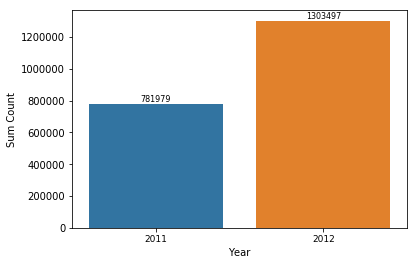

In [171]:
yearCount = pd.DataFrame(catVar.groupby("year", sort=True)["count"].sum()).reset_index()
sns.barplot(data=yearCount, x="year", y="count")
plt.xlabel("Year")
plt.xticks(fontsize=9)
plt.ylabel("Sum Count")
x = np.arange(2)
y = np.array(list(yearCount["count"]))
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha="center", va="bottom", fontsize=8)
plt.savefig("year-sumCount.png")
plt.show()

The demand of bike sharing rose a lot from 2011 to 2012, nearly doubled.

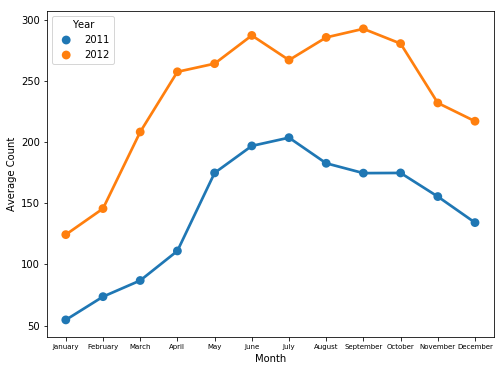

In [189]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
monthCount = pd.DataFrame(catVar.groupby(["month","year"])["count"].mean()).reset_index()
plt.figure(figsize=(8,6))
sns.pointplot(x=monthCount["month"], y=monthCount["count"], hue=monthCount["year"], data=monthCount, join=True, order=sortOrder)
plt.xlabel("Month")
plt.ylabel("Average Count")
plt.legend(loc=2, prop={'size':10}, title="Year")
plt.xticks(fontsize=7)
plt.savefig("MonthYear.png")
plt.show()

Bike sharing has the highest demand in the period between April and September, which is approximate summer and fall. This month feature delivers similar information as the season feature does.